In [40]:
# Avataan peruskirjastot, numpy mukana muita testejä varten

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [41]:
df1=pd.read_excel('http://taanila.fi/wine.xlsx')

In [42]:
# Tsekataan onko data järkevää, muuttujat on nimetty huonosti

df1.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
# Tsekkaan datan noin muutenkin, että on vähän hajua

df1.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [44]:
# Datan lähteestä löytyi muuttujien englanninkieliset nimet. Sarake 'Y' menee oletuksena rypälelajikkeeksi. Lajikkeiden
# nimiä ei tullut vastaan, joten pidetään ne numeroina.

df1.columns = ['Grape', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavonoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [45]:
# Katsotaan onnistuiko

df1.head()

,Grape,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [46]:
# Katson onko datassa tyhjiä arvoja

df1.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int64

F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


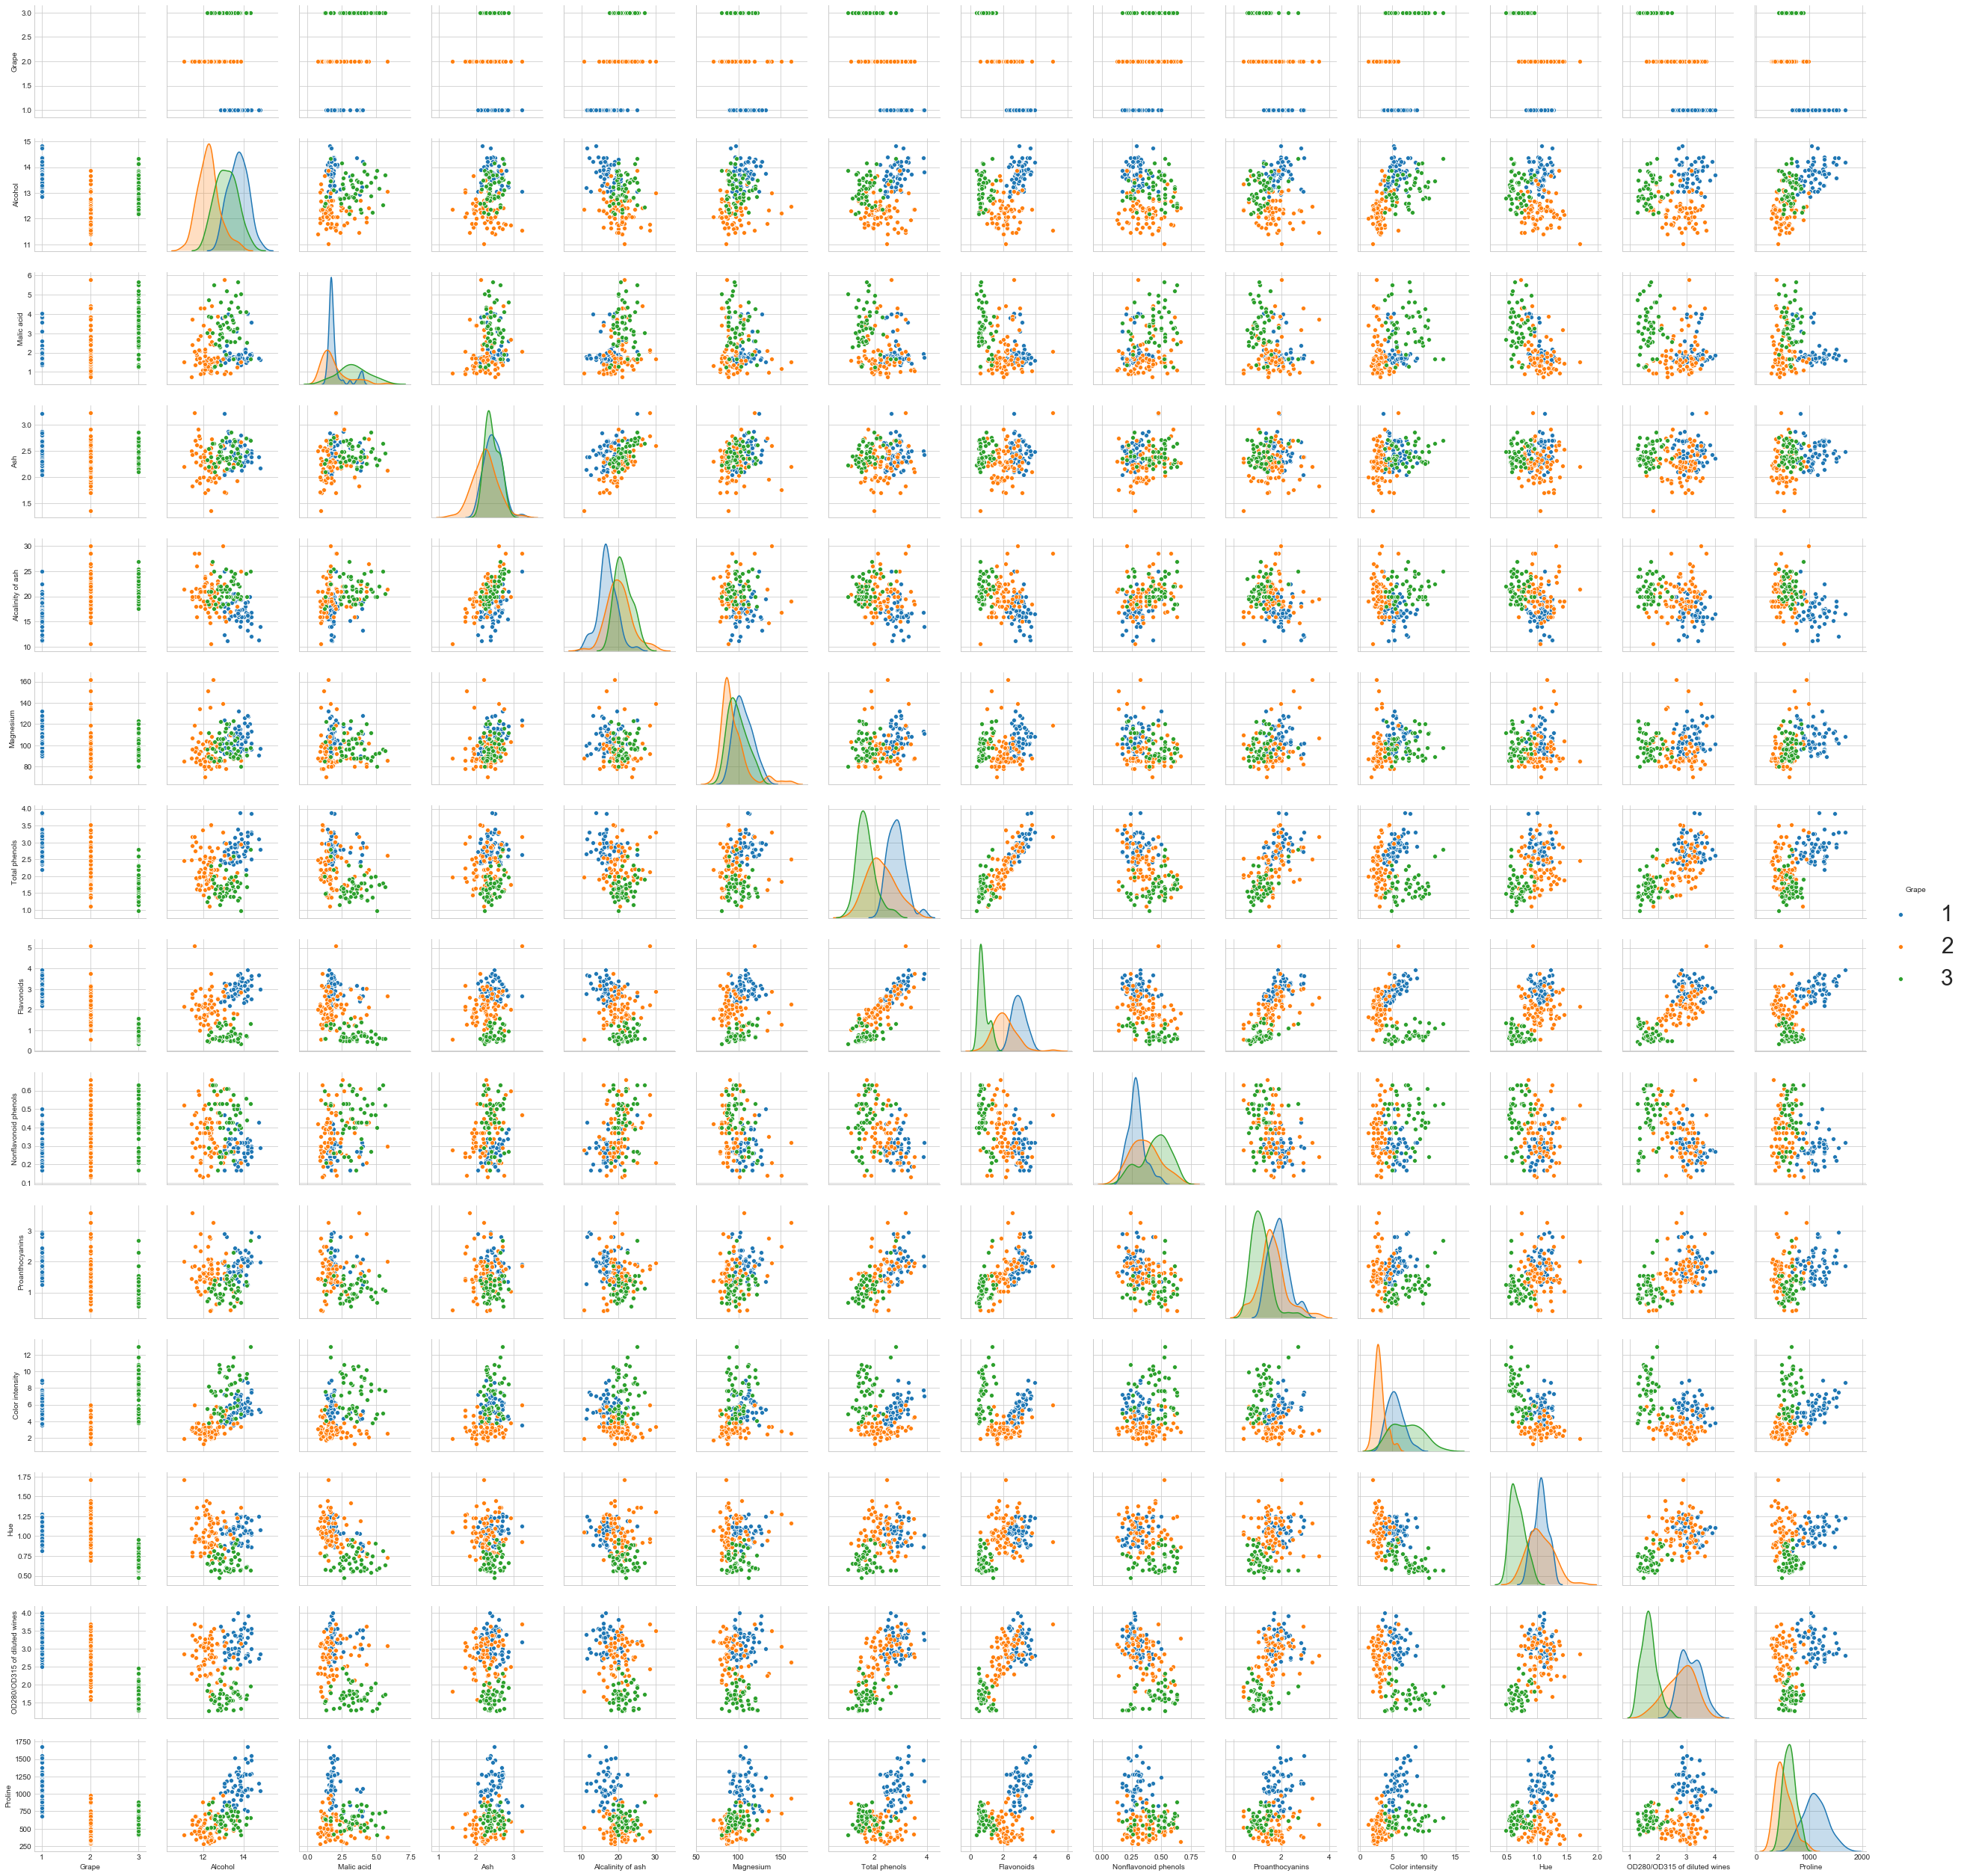

In [47]:
# Tässä videon opastuksen mukainen pairplot sävyillä. Nostin hieman selitteen fonttia, että se on edes vähän paremmin
# luettavissa. Vaikka lajikkeet menevätkin päällekkäin enemmän kuin kurjenmiekat, huomaa kyllä selkeän eron.

params = {'legend.fontsize': 30,
          'legend.handlelength': 2}
plt.rcParams.update(params)

sns.pairplot(df1, hue='Grape')

In [70]:
# Luodaan datalle oliot

X = df1.drop('Grape', axis=1)
y = df1['Grape']

In [71]:
# Tässää tuodaan tarvittava funktio ja luodaan opetus- ja testidata

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [72]:
# Sovitetaan malli dataan. Testaamalla n_neighbors arvoa sain myöhemmin opetus- ja testidatojen accuracyn lähelle toisiaan.

from sklearn.neighbors import KNeighborsClassifier

model_wine = KNeighborsClassifier(n_neighbors=24)
model_wine.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [73]:
y_train_model = model_wine.predict(X_train)
y_test_model = model_wine.predict(X_test)

In [74]:
# Tässä näkyy aiempi n_neighbors arvon välppääminen. Aluksi eroa oli 12 prosenttia, mutta muuttamalla arvoa, sain sen suht
# lähelle toisiaan. Prosenttimäärä tarkkuudelle olisi toki hyvä olla paljon korkeampi, noin mallia ajatellen. Kokeilen
# myöhemmin toisella tavalla..

from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_model)

0.7142857142857143

In [75]:
accuracy_score(y_test, y_test_model)

0.7111111111111111

In [76]:
# Confusion_matrix. Malli osaa luokitella ensimmäisen lajikkeen ok, toisen huonommin ja kolmas onkin jo huono.

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_model))

[[39  1  4]
 [ 3 44  9]
 [ 3 18 12]]


In [77]:
df1['Grape'].value_counts()

2    71
1    59
3    48
Name: Grape, dtype: int64

In [82]:
# Testidatankaan malli ei ole paras mahdollinen. Yritin käydä muitakin parametrejä lävitse, mutta en ainakaan
# heti löytänyt vaikutusta. 

print(confusion_matrix(y_test, y_test_model))

[[15  0  0]
 [ 1 13  1]
 [ 2  9  4]]


In [83]:
# Päätöspuu-malli

from sklearn import tree

# Uuden mallin luominen ohjeen mukaan

model_wine2 = tree.DecisionTreeClassifier(max_depth=12)
model_wine2.fit(X_train, y_train)

y_train_model2 = model_wine2.predict(X_train)
y_test_model2 = model_wine2.predict(X_test)

In [84]:
# Tällä saadaankin jo 100% 

print(accuracy_score(y_train, y_train_model2))

1.0


In [85]:
# Mutta testidatan tarkkuus jää alhaisemmaksi. Tämä riippuu DecisionTreeClassierin muuttujasta max_depth. Tuo oli korkein
# mitä hakemalla löysin.

print(accuracy_score(y_test, y_test_model2))

0.9111111111111111


In [86]:
# Kuten voi olettaa, osaa malli tässä luokitella kaikki lajikkeet.

print(confusion_matrix(y_train, y_train_model2))

[[44  0  0]
 [ 0 56  0]
 [ 0  0 33]]


In [87]:
# Alemman tarkkuuden testidata taas ei osu täysin oikeaan.

print(confusion_matrix(y_test, y_test_model2))

[[15  0  0]
 [ 0 14  1]
 [ 2  1 12]]


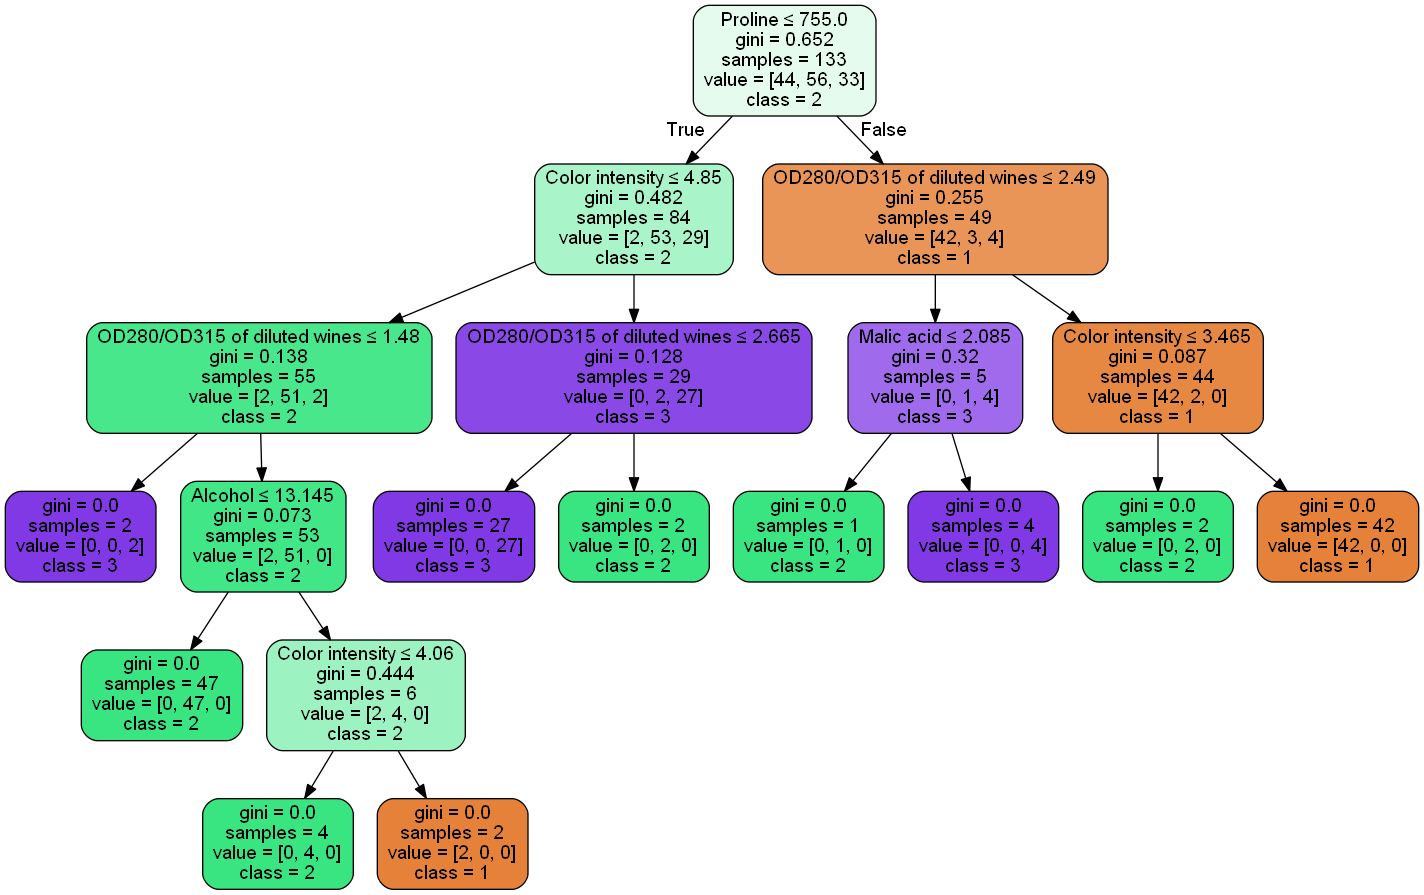

In [88]:
# Sain kun sainkin asennettua pydotplussan ja graphvizin. Graphviz tosiaan täytyi lisätä Windowsin patheihin, mutta
# lopulta homma toimii.

import graphviz
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(model_wine2, out_file=None,
                               feature_names=X.columns,
                               class_names=['1', '2', '3'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [89]:
# Gaussian Naive Bayes, mallin tekeminen

from sklearn.naive_bayes import GaussianNB

model_wine3 = GaussianNB()
model_wine3.fit(X_train, y_train)

y_train_model3 = model_wine3.predict(X_train)
y_test_model3 = model_wine3.predict(X_test)

In [90]:
accuracy_score(y_train, y_train_model3)

0.9849624060150376

In [91]:
accuracy_score(y_test, y_test_model3)

1.0

In [92]:
print(confusion_matrix(y_train, y_train_model3))

[[43  1  0]
 [ 0 55  1]
 [ 0  0 33]]


In [93]:
print(confusion_matrix(y_test, y_test_model3))

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [94]:
# Mallilla ennustaminen osuu hyvin oikein.